In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Numba

 You have some code... you want to make it run fast 

### Why do we use python?

+ Readability and simplicity
+ Rapid development and protyping
+ Rich eco system of inbuilt libraries and frameworks
+ Large and helpful community

### What are we missing?

+ Speed?

## Compiled code vs Interpreted Code

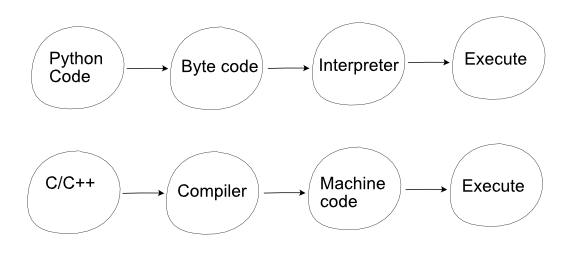

## How Numba works

<font size = 6> **Just in time (run time) compiler which converts bytecode to machine code** </font>

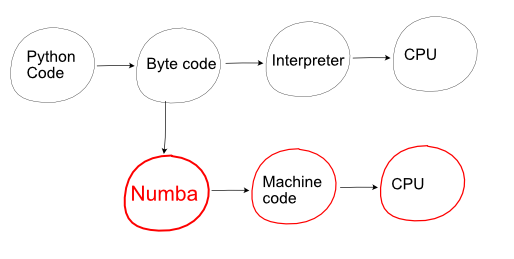

<font size = 6> Convenient : To use Numba to compile your code, you just need to apply one of the Numba decorators to your Python function </font>

In [2]:
import numpy as np
import numba

In [3]:
def integrate(a, b, n):
    s = 0.0
    dx = (b - a) / n
    for i in range(n):
        x = a + (i + 0.5) * dx
        y = x ** 4 - 3 * x
        s += y * dx
    return s

In [4]:
a = 0
b = 2
n = 1_000_000

In [5]:
plaintime = %timeit -o integrate(a, b, n)

334 ms ± 7.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
#Add Numba decorator here
@numba.njit 
def numba_integrate(a, b, n):
    s = 0.0
    dx = (b - a) / n
    for i in range(n):
        x = a + (i + 0.5) * dx
        y = x ** 4 - 3 * x
        s += y * dx
    return s

#now the decorated function will run entirely without 
#the involvement of the Python interpreter.

In [7]:
jittedtime = %timeit -o -n 10 numba_integrate(a, b, n)

The slowest run took 38.53 times longer than the fastest. This could mean that an intermediate result is being cached.
12.2 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
np.testing.assert_almost_equal(numba_integrate(a, b, n), integrate(a, b, n))

In [9]:
plaintime.best/jittedtime.best

171.60698320412175

<font size = 6>Why is there a slow run? </font>

Numba has to compile your function for the argument types given before it executes the machine code version of your function. This takes time. 

However, once the compilation has taken place Numba caches the machine code version of your function for the particular types of datatypes presented. 

If it is called again, it can reuse the cached version, if it sees the same datatypes, instead of having to compile again.

In [10]:
@numba.njit
def numba_integrate(a, b, n):
    s = 0.0
    dx = (b - a) / n
    for i in range(n):
        x = a + (i + 0.5) * dx
        y = x ** 4 - 3 * x
        s += y * dx
    return s          

# COMPILATION TIME!
start = time.perf_counter()
numba_integrate(a, b, n)
end = time.perf_counter()
print("Elapsed (with compilation) = %0.5fs" %(end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.perf_counter()
numba_integrate(a, b, n)
end = time.perf_counter()
print("Elapsed (after compilation) = %0.5fs" %(end - start))

#Original function
start = time.perf_counter()
integrate(a, b, n)
end = time.perf_counter()
print("Elapsed (without numba) = %0.5fs" %(end - start))

Elapsed (with compilation) = 0.19546s
Elapsed (after compilation) = 0.00347s
Elapsed (without numba) = 0.38547s


In [11]:
numba_integrate.signatures

[(int64, int64, int64)]

In [12]:
numba_integrate(0, 2, 10000)

0.39999994666667177

## What can you use numba on?

If your code is numerically orientated (does a lot of math), uses NumPy a lot and/or has a lot of loops, then Numba is often a good choice.

* Functions with loops
* Functions with mathematical operations
* Functions using numpy

***OK***: tuples, strings

***Not good***: objects, Python lists, python dicts

<font size=8> **Hands on exercise** <font>

Function ```estimate_pi``` calculates the value of $pi$

Notice that the greater the value of n, the better is the estimate of $pi$

You task is to:
+ Use time or timeit to benchmark the speed up in execution of the function for different *n* with and without numba
+ Plot the difference in time for different *n* with and without numba 

**(Ensure that the numba function is compiled before timing the function)**

In [13]:
#This function takes n as input which is the number of total points within the square
#It then estimates how many of those points are within the circle
# value of pi = 4 * numberofpointsincircle/numberofpointsinsquare

def estimate_pi(n):
    np.random.seed(1234)
    count_inside_circle = 0
    for _ in range(n): #Numba likes loops
        x = np.random.uniform(-1, 1) #Numba likes numpy functions
        y = np.random.uniform(-1, 1)
        
        if x**2 + y**2 <= 1:
            count_inside_circle += 1
    
    pi_estimate = 4 * count_inside_circle / n #Numba likes math
    return pi_estimate

In [14]:
@numba.njit
def numba_estimate_pi(n):
    np.random.seed(1234)
    count_inside_circle = 0
    for _ in range(n): #Numba likes loops
        x = np.random.uniform(-1, 1) #Numba likes numpy functions
        y = np.random.uniform(-1, 1)
        
        if x**2 + y**2 <= 1:
            count_inside_circle += 1
    
    pi_estimate = 4 * count_inside_circle / n #Numba likes math
    return pi_estimate
numba_estimate_pi(2); #Compile

In [15]:
n = [10, 1000, 10000, 100_000, 1_000_000]
for i in n:
    pi_estimate = estimate_pi(i)
    print("Number of runs %d, Estimated Pi: %0.2f" %(i, pi_estimate))

Number of runs 10, Estimated Pi: 3.60
Number of runs 1000, Estimated Pi: 3.06
Number of runs 10000, Estimated Pi: 3.12
Number of runs 100000, Estimated Pi: 3.14
Number of runs 1000000, Estimated Pi: 3.14


In [16]:
#Time functions with and without numba
plaintime, jittedtime = [], []
for idx, i in enumerate(n):
    print('Calculating using n=%d' %i)
    temptime = %timeit -o -q estimate_pi(i)
    plaintime.append(temptime.best)
    
    temptime = %timeit -o -q numba_estimate_pi(i)
    jittedtime.append(temptime.best)

Calculating using n=10
Calculating using n=1000
Calculating using n=10000
Calculating using n=100000
Calculating using n=1000000


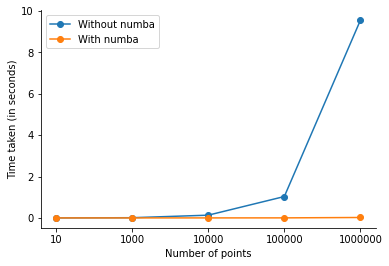

In [17]:
#Plot the results
fs, ax = plt.subplots(1)
ax.plot(np.arange(len(n)), plaintime, marker='o', label='Without numba')
ax.plot(np.arange(len(n)), jittedtime, marker='o', label='With numba')
ax.set_xticks(np.arange(len(n)))
ax.set_xticklabels(n)
ax.set_xlabel('Number of points')
ax.set_ylabel('Time taken (in seconds)')
# ax.set_yscale('log')
ax.legend()
sns.despine()

## What does numba *not* do? : Choose wisely!
* Magically make individual numpy functions faster, or speed up code that just has nice array operations
* Convert aribitrary python data types
* Translate entire programs
* Compile third party libraries
* Numba cannot help speed up algorithms that are not primarily numerical

### Example 1 : Numba does not work on pandas dataframes

In [18]:
import pandas as pd

x = {'a': [1, 2, 3], 'b': [20, 30, 40]}

@numba.njit
def use_pandas(a): # Function will not benefit from Numba jit
    df = pd.DataFrame.from_dict(a) # Numba doesn't know about pd.DataFrame
    df += 1                        # Numba doesn't understand what this is
    return df.cov()                # or this!

print(use_pandas(x))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
non-precise type pyobject
During: typing of argument at <ipython-input-18-52bead916339> (7)

File "<ipython-input-18-52bead916339>", line 7:
def use_pandas(a): # Function will not benefit from Numba jit
    df = pd.DataFrame.from_dict(a) # Numba doesn't know about pd.DataFrame
    ^ 

This error may have been caused by the following argument(s):
- argument 0: Cannot determine Numba type of <class 'dict'>


> @njit stands for @jit(nopython=True) and it means that numba should throw an exception instead of falling back to the python version, in cases where it cannot generate the optimized version.

### Example 2 : Numba will not speed up a single numpy function

In [19]:
n_a = 100_000
a = np.random.normal(0, 1,n_a)

In [20]:
def just_sum(a):
    result = 0
    for i in range(a.shape[0]):
        result += a[i]
    return result

In [21]:
def numpy_sum(a):
    return np.sum(a)

In [22]:
forlooptime = %timeit -n 10 -r 5 -o just_sum(a)
numpytime = %timeit -n 10 -r 5 -o numpy_sum(a)

43.5 ms ± 10.1 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
95.3 µs ± 50.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [23]:
np.testing.assert_allclose(just_sum(a), numpy_sum(a))

In [24]:
@numba.njit
def just_sum(a):
    result = 0
    for i in range(a.shape[0]):
        result += a[i]
    return result
just_sum(a); #Compile

In [25]:
jittedforlooptime = %timeit -n 10 -r 5 -o just_sum(a)

146 µs ± 55 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [26]:
@numba.njit
def numpy_sum(a):
    return np.sum(a)
numpy_sum(a);

In [27]:
jittednumpytime = %timeit -n 10 -r 5 -o numpy_sum(a)

113 µs ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


In [28]:
labels = ['For loop sum', 'Numpy sum', 'For loop sum with numba', 'Numpy sum with numba']
for idx, i in enumerate([forlooptime, numpytime, jittedforlooptime, jittednumpytime]):
    print('%s: %0.2f ms' %(labels[idx], i.best*1000))

For loop sum: 34.86 ms
Numpy sum: 0.06 ms
For loop sum with numba: 0.11 ms
Numpy sum with numba: 0.10 ms


### Example 3 : you get more benefits if you had more numpy functions and loops

In [29]:
n_obs = 100_000

In [30]:
observation = np.random.rand(n_obs, 2)
clusters = np.random.rand(1000, 2)

In [31]:
def many_numpy_functions(x, y):
    closest = np.zeros(x.shape[0])
    for count, i in enumerate(x):
        diff = i-y
        dist = np.sqrt(np.sum(diff**2, axis=1))
        closest[count] = np.argmin(diff)
    return closest

In [ ]:
numpytime = %timeit -o many_numpy_functions(observation, clusters) 

In [ ]:
@numba.njit
def jitted_numpy_functions(x, y):
    closest = np.zeros(x.shape[0])
    for count, i in enumerate(x):
        diff = i-y
        dist = np.sqrt(np.sum(diff**2, axis=1))
        closest[count] = np.argmin(diff)
    return closest
jitted_numpy_functions(np.array([30.0, 99.0]), clusters); #Compile

In [ ]:
numbatime = %timeit -o jitted_numpy_functions(observation, clusters)

In [ ]:
numpytime.best/numbatime.best

<font size=6> There are other things numba cannot do </font>
* Does not give fine grained control : everything is magic
* If you need to interface to C++